# 模型結果分析
This notebook analyze the magnetization produced by model and plot the result.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

import bornholdt_modulized

### 讀檔案

In [3]:
M_t_values = pd.read_csv('M_t_50000_10_0.7.csv', index_col=0)

M_t_values


,0
0,142
1,-404
2,64
3,106
4,-508
...,...
2997,5830
2998,5920
2999,5982
3000,6288


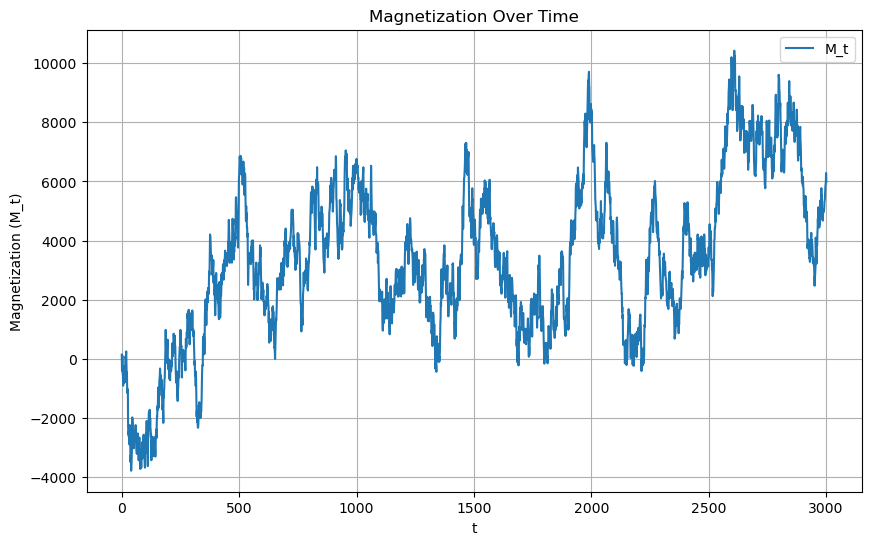

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(M_t_values, label='M_t')
plt.title('Magnetization Over Time')
plt.xlabel('t')
plt.ylabel('Magnetization (M_t)')
plt.legend()
plt.grid(True)

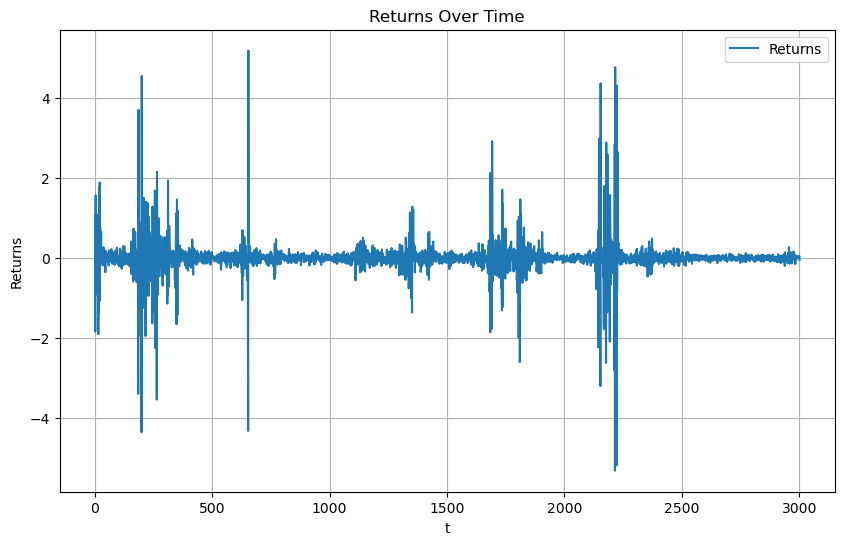

,0
1,1.045588
2,-1.842532
3,0.504556
4,1.567042
5,0.132547
...,...
2997,0.026418
2998,0.015319
2999,0.010419
3000,0.049888


In [41]:
returns = np.log(np.abs(M_t_values)) - np.log(np.abs(M_t_values.shift(1)))
#returns = M_t_values - M_t_values.shift(1)
returns = returns.dropna()
plt.figure(figsize=(10, 6))
plt.plot(returns, label='Returns')
plt.title('Returns Over Time')
plt.xlabel('t')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()
returns

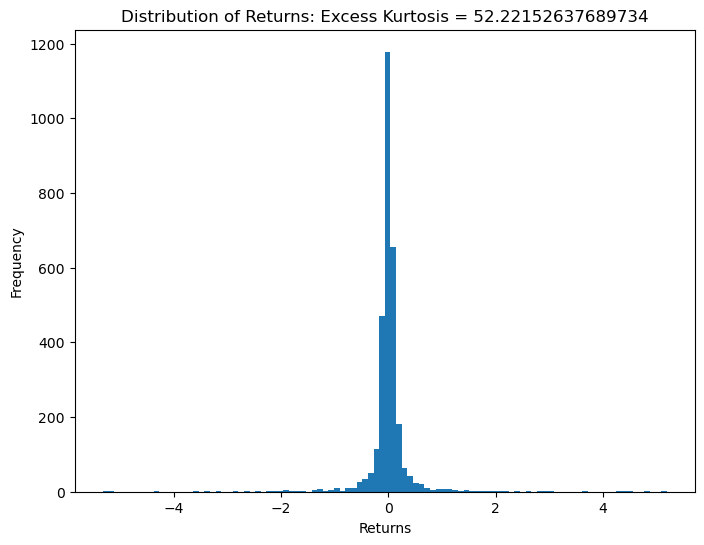

In [42]:
excess_kurtosis = stats.kurtosis(returns.dropna())
plt.figure(figsize=(8, 6))
plt.hist(returns.dropna(), bins=100)
plt.title(f'Distribution of Returns: Excess Kurtosis = {excess_kurtosis[0]}')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.show()

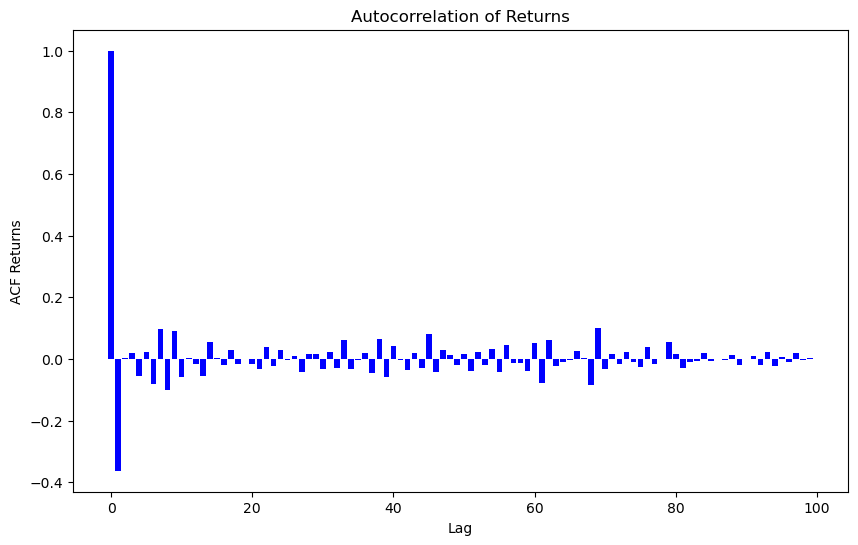

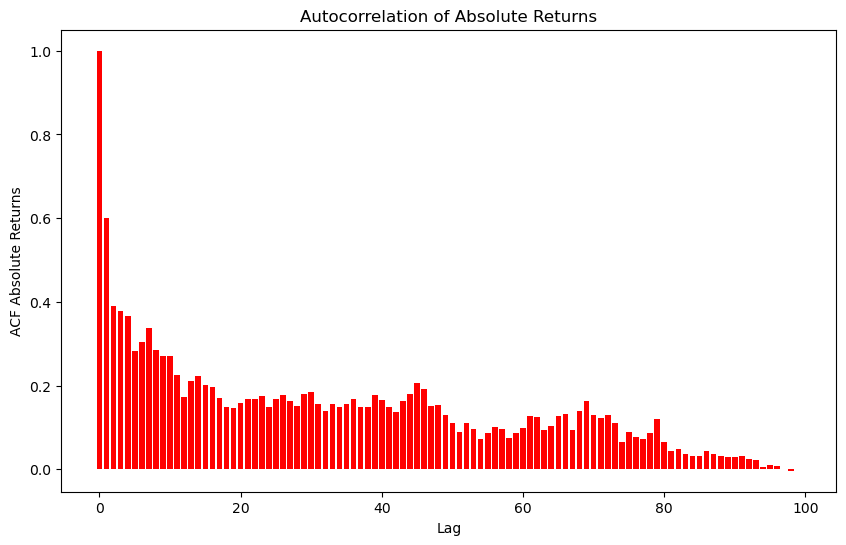

In [44]:
absolute_returns = np.abs(returns)

lags = 100
acf_rt = [returns['0'].autocorr(lag=i) for i in range(lags)]
acf_abs = [absolute_returns['0'].autocorr(lag=i) for i in range(lags)]

plt.figure(figsize=(10, 6))
plt.bar(range(lags), acf_rt, color='blue')
plt.title('Autocorrelation of Returns')
plt.xlabel('Lag')
plt.ylabel('ACF Returns')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(lags), acf_abs, color='red')
plt.title('Autocorrelation of Absolute Returns')
plt.xlabel('Lag')
plt.ylabel('ACF Absolute Returns')
plt.show()

/var/folders/q_/2nhldr_d2x723c91y7qt5g2r0000gn/T/ipykernel_86468/1435290095.py:9: RuntimeWarning: divide by zero encountered in log
  filtered_log_cumulative = np.log((1 - cumulative_distribution)[filtered_indices])


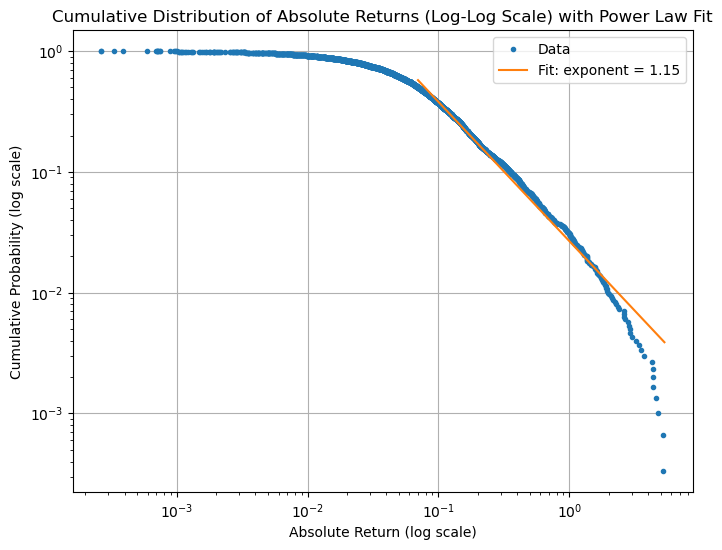

In [53]:
absolute_returns = np.abs(returns['0'])
sorted_abs_returns = np.sort(absolute_returns)
cumulative_distribution = np.arange(1, len(sorted_abs_returns) + 1) / len(sorted_abs_returns)

epsilon = 5*10e-2  # Small threshold to exclude the tail
filtered_indices = np.where(1 - cumulative_distribution < epsilon)

filtered_log_returns = np.log(sorted_abs_returns[filtered_indices])
filtered_log_cumulative = np.log((1 - cumulative_distribution)[filtered_indices])

slope, intercept, r_value, p_value, std_err = stats.linregress(filtered_log_returns[np.logical_and(np.isfinite(filtered_log_returns), np.isfinite(filtered_log_cumulative))], filtered_log_cumulative[np.logical_and(np.isfinite(filtered_log_cumulative), np.isfinite(filtered_log_returns))])

plt.figure(figsize=(8, 6))
plt.loglog(sorted_abs_returns, 1 - cumulative_distribution, marker='.', linestyle='none', label='Data')
plt.loglog(sorted_abs_returns[filtered_indices], np.exp(intercept) * sorted_abs_returns[filtered_indices] ** slope, label=f'Fit: exponent = {-slope:.2f}')
plt.title('Cumulative Distribution of Absolute Returns (Log-Log Scale) with Power Law Fit')
plt.xlabel('Absolute Return (log scale)')
plt.ylabel('Cumulative Probability (log scale)')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
from arch import arch_model

am = arch_model(returns.dropna(), vol='ARCH', p=10)
res = am.fit()

Iteration:      1,   Func. Count:     14,   Neg. LLF: 27179.76246411261
Iteration:      2,   Func. Count:     33,   Neg. LLF: 581.8485883496428
Iteration:      3,   Func. Count:     47,   Neg. LLF: -1016.2137435567585
Iteration:      4,   Func. Count:     61,   Neg. LLF: 21963.661409559332
Iteration:      5,   Func. Count:     80,   Neg. LLF: 439397.68277913117
Iteration:      6,   Func. Count:     94,   Neg. LLF: 9374.963194393415
Iteration:      7,   Func. Count:    108,   Neg. LLF: -800.7193131298956
Iteration:      8,   Func. Count:    122,   Neg. LLF: 411.7387963984064
Iteration:      9,   Func. Count:    136,   Neg. LLF: -460.3905562690149
Iteration:     10,   Func. Count:    150,   Neg. LLF: 148.63714358626618
Iteration:     11,   Func. Count:    164,   Neg. LLF: -427.0172762287705
Iteration:     12,   Func. Count:    178,   Neg. LLF: -451.91221845236703
Iteration:     13,   Func. Count:    192,   Neg. LLF: -1109.7667803101797
Iteration:     14,   Func. Count:    206,   Neg. LLF

In [31]:
print(res.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      0   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                1533.91
Distribution:                  Normal   AIC:                          -3043.82
Method:            Maximum Likelihood   BIC:                          -2971.74
                                        No. Observations:                 3001
Date:                Wed, Apr 24 2024   Df Residuals:                     3000
Time:                        12:31:24   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.2804e-04  1.734e-03     -0.132      0.